<a href="https://colab.research.google.com/github/CaiqueSil/Linear-SVM-for-water-potability-analysis/blob/main/SVMWater_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer, roc_auc_score, average_precision_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.impute import SimpleImputer
from statistics import mean, stdev


In [ ]:
df = pd.read_csv('/content/water.csv')

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0
...,...,...,...,...,...,...,...,...,...,...
9995,7.020971,195.918303,21485.847739,7.019282,332.814656,430.637117,14.470552,67.697333,3.912803,0
9996,7.238648,195.613341,21565.440906,7.095263,332.829069,426.360715,14.267106,65.859665,3.978627,0
9997,7.073473,194.461197,21951.368744,7.077604,335.432478,419.875824,14.306482,64.515396,4.015702,0
9998,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.091423,196.028208,21984.910331,7.135162,333.063156,426.360604,14.339111,66.465396,3.972793,0.500000
std,0.706589,14.636373,3895.384413,0.710279,18.513111,36.080914,1.484742,7.182162,0.350731,0.500025
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,7.022816,194.609577,21458.018822,7.057332,331.124701,422.515794,14.188197,65.750893,3.935476,0.000000
50%,7.093586,196.057913,21977.488628,7.133492,333.098363,426.246982,14.335375,66.469224,3.973391,0.500000
75%,7.161077,197.460684,22503.494592,7.215818,334.943071,429.921153,14.483844,67.200320,4.010571,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,708.226364,27.006707,124.000000,6.494749,1.000000


In [ ]:
graph = px.scatter_matrix(df, dimensions = ['ph', 'Potability','Turbidity'])
graph.show()

In [ ]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


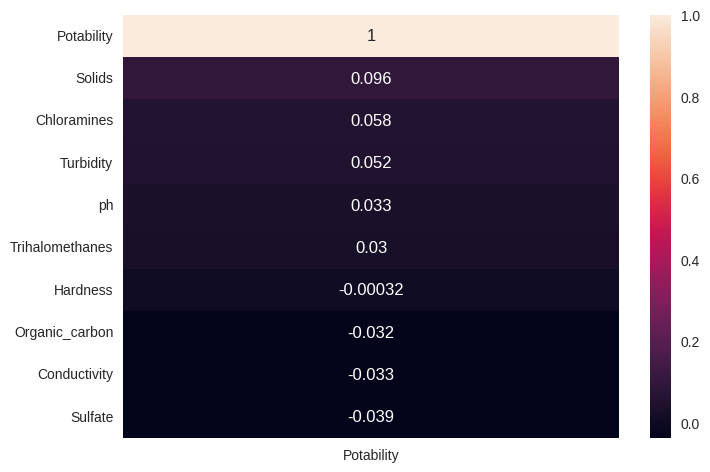

In [ ]:
corr = df.corr()
sns.heatmap(corr[['Potability']].sort_values(by='Potability', ascending=False), annot=True)
plt.show()

In [ ]:
x = df[['ph',	'Chloramines',	'Sulfate',	'Conductivity',	'Trihalomethanes',	'Turbidity',]]

In [ ]:
y = df['Potability']

In [ ]:

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(x, y)

feature_scores = dict(zip(x.columns, selector.scores_))
#print(sorted(feature_scores.items(), key=lambda x: x[1]))
print(sorted(feature_scores.items(), key=lambda x: x[1], reverse=True))


[('Chloramines', np.float64(34.030713471311444)), ('Turbidity', np.float64(26.740994530612177)), ('Sulfate', np.float64(15.001529331010044)), ('Conductivity', np.float64(10.687384503400732)), ('ph', np.float64(10.681286190163021)), ('Trihalomethanes', np.float64(8.819324367322142))]


In [ ]:
svm_clf = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
    ('linear_svc',LinearSVC(C=1, loss = 'hinge',max_iter = 500000, class_weight = 'balanced'))])

skf = StratifiedKFold(n_splits=200, shuffle=True, random_state=42)
lst_accu_stratified = []

In [ ]:
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
for train_index, test_index in skf.split(x,y):
  x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]
  svm_clf.fit(x_train_fold, y_train_fold)
  lst_accu_stratified.append(svm_clf.score(x_test_fold, y_test_fold))

In [ ]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.74, 0.72, 0.66, 0.62, 0.76, 0.6, 0.68, 0.72, 0.74, 0.7, 0.76, 0.74, 0.7, 0.76, 0.68, 0.66, 0.8, 0.76, 0.68, 0.78, 0.7, 0.64, 0.68, 0.66, 0.78, 0.72, 0.7, 0.64, 0.74, 0.8, 0.72, 0.74, 0.66, 0.66, 0.7, 0.7, 0.74, 0.64, 0.66, 0.62, 0.76, 0.76, 0.74, 0.72, 0.72, 0.72, 0.76, 0.76, 0.78, 0.74, 0.7, 0.76, 0.78, 0.88, 0.8, 0.76, 0.72, 0.72, 0.72, 0.68, 0.72, 0.66, 0.72, 0.78, 0.62, 0.68, 0.6, 0.7, 0.74, 0.64, 0.62, 0.76, 0.66, 0.78, 0.68, 0.8, 0.7, 0.8, 0.8, 0.64, 0.68, 0.74, 0.66, 0.64, 0.74, 0.72, 0.66, 0.74, 0.74, 0.8, 0.78, 0.68, 0.82, 0.78, 0.76, 0.68, 0.6, 0.78, 0.68, 0.76, 0.62, 0.74, 0.78, 0.66, 0.8, 0.7, 0.66, 0.76, 0.8, 0.76, 0.72, 0.72, 0.8, 0.74, 0.8, 0.7, 0.76, 0.7, 0.56, 0.72, 0.62, 0.82, 0.72, 0.6, 0.74, 0.74, 0.84, 0.72, 0.74, 0.7, 0.8, 0.64, 0.74, 0.72, 0.88, 0.7, 0.74, 0.68, 0.74, 0.72, 0.78, 0.74, 0.8, 0.7, 0.68, 0.78, 0.7, 0.72, 0.76, 0.7, 0.74, 0.7, 0.72, 0.8, 0.74, 0.72, 0.6, 0.76, 0.82, 0.66, 0.72, 0.7, 0.82, 0.78, 0.68, 0.78, 0.64, 0.76, 0.

In [ ]:
roc_scores = cross_val_score(
    svm_clf, x, y, cv=skf, scoring="roc_auc"
)

In [ ]:
pr_scores = cross_val_score(
    svm_clf, x, y, cv=skf, scoring="average_precision"
)

In [ ]:
print("ROC AUC mean:", roc_scores.mean())
print("ROC AUC std :", roc_scores.std())

ROC AUC mean: 0.724072
ROC AUC std : 0.05924215742189003


In [ ]:
print("PR mean:", pr_scores.mean())
print("PR std :", pr_scores.std())

PR mean: 0.667448898459197
PR std : 0.06006005950478721


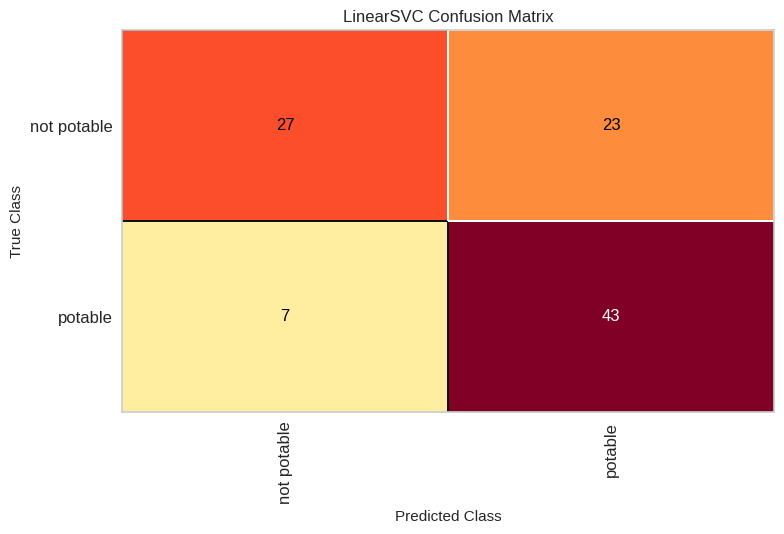

<Axes: title={'center': 'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# @title Texto de título padrão
cm = ConfusionMatrix(svm_clf, classes=['not potable','potable'])
cm.fit(x_train_fold, y_train_fold)
cm.score(x_test_fold, y_test_fold)
cm.show()